# DATA ANALYSIS USING GAME OF THRONES DATA

In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
battle = pd.read_csv('battles.csv')
battle.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [3]:
battle.shape

(38, 25)

#### data isnpection

In [5]:
battle.rename(columns={'attacker_1': 'primary_attacker',
                      'defender_1' : 'primary_defender'}, inplace=True)
battle.head()

,name,year,battle_number,attacker_king,defender_king,primary_attacker,attacker_2,attacker_3,attacker_4,primary_defender,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [6]:
battle.describe(include='all')

,name,year,battle_number,attacker_king,defender_king,primary_attacker,attacker_2,attacker_3,attacker_4,primary_defender,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
count,38,38.000000,38.000000,36,35,38,10,3,2,37,...,37.000000,37.000000,24.000000,19.000000,37,28,37.000000,37,38,5
unique,38,NaN,NaN,4,6,11,7,2,1,12,...,NaN,NaN,NaN,NaN,31,28,NaN,27,7,5
top,Battle of the Green Fork,NaN,NaN,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Tully,Mormont,Glover,Lannister,...,NaN,NaN,NaN,NaN,Gregor Clegane,Roose Bolton,NaN,Riverrun,The Riverlands,Greyjoy's troop number comes from the 264 esti...
freq,1,NaN,NaN,14,14,8,3,2,2,9,...,NaN,NaN,NaN,NaN,4,1,NaN,3,17,1
mean,NaN,299.105263,19.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.351351,0.297297,9942.541667,6428.157895,NaN,NaN,0.702703,NaN,NaN,NaN
std,NaN,0.689280,11.113055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.483978,0.463373,20283.092065,6225.182106,NaN,NaN,0.463373,NaN,NaN,NaN
min,NaN,298.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,20.000000,100.000000,NaN,NaN,0.000000,NaN,NaN,NaN
25%,NaN,299.000000,10.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,1375.000000,1070.000000,NaN,NaN,0.000000,NaN,NaN,NaN
50%,NaN,299.000000,19.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,4000.000000,6000.000000,NaN,NaN,1.000000,NaN,NaN,NaN
75%,NaN,300.000000,28.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,1.000000,8250.000000,10000.000000,NaN,NaN,1.000000,NaN,NaN,NaN


In [8]:
battle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                38 non-null     object 
 1   year                38 non-null     int64  
 2   battle_number       38 non-null     int64  
 3   attacker_king       36 non-null     object 
 4   defender_king       35 non-null     object 
 5   primary_attacker    38 non-null     object 
 6   attacker_2          10 non-null     object 
 7   attacker_3          3 non-null      object 
 8   attacker_4          2 non-null      object 
 9   primary_defender    37 non-null     object 
 10  defender_2          2 non-null      object 
 11  defender_3          0 non-null      float64
 12  defender_4          0 non-null      float64
 13  attacker_outcome    37 non-null     object 
 14  battle_type         37 non-null     object 
 15  major_death         37 non-null     float64
 16  major_capt

In [9]:
battle.attacker_king.value_counts()

Joffrey/Tommen Baratheon    14
Robb Stark                  10
Balon/Euron Greyjoy          7
Stannis Baratheon            5
Name: attacker_king, dtype: int64

In [10]:
battle.location.value_counts()

Riverrun                                3
Winterfell                              3
Harrenhal                               2
Deepwood Motte                          2
Torrhen's Square                        2
Storm's End                             2
Moat Cailin                             2
Darry                                   2
Seagard                                 1
Golden Tooth                            1
Shield Islands                          1
The Twins                               1
Whispering Wood                         1
Ryamsport, Vinetown, Starfish Harbor    1
Ruby Ford                               1
King's Landing                          1
Castle Black                            1
Raventree                               1
Green Fork                              1
Duskendale                              1
Saltpans                                1
Oxcross                                 1
Crag                                    1
Stony Shore                       

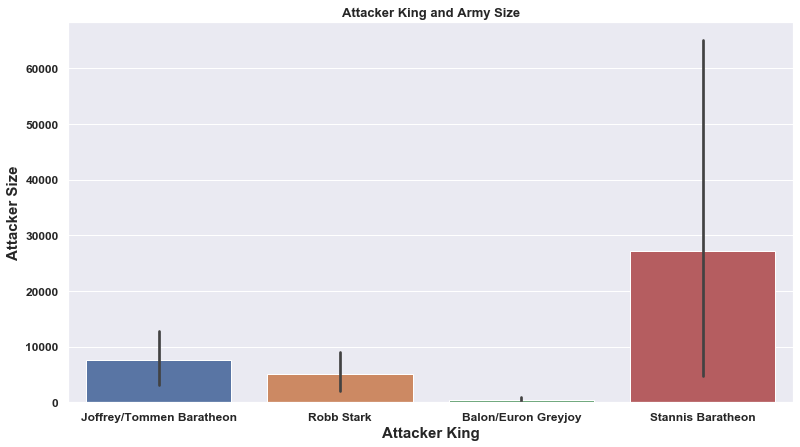

In [23]:
sns.set(rc={'figure.figsize':(13,7)})
sns.barplot(x='attacker_king', y='attacker_size', data = battle)
plt.xlabel('Attacker King', fontsize=15, weight='bold')
plt.ylabel('Attacker Size', fontsize=15, weight='bold')
plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.title('Attacker King and Army Size', fontsize=13, weight='bold')
plt.show()

> During attack, Stannis Baratheon attacks with the largest force as compared to the other attacker kings.

> Joffery and T Baratheon use a force a lil below 10,000 adn Stark at about half of 10,000.

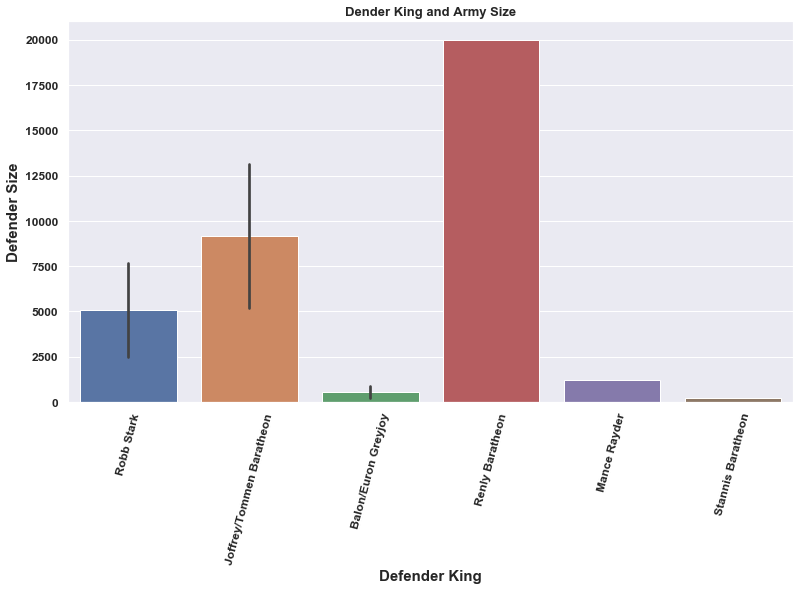

In [27]:
sns.set(rc={'figure.figsize':(13,7)})
sns.barplot(x='defender_king', y='defender_size', data = battle)
plt.xlabel('Defender King', fontsize=15, weight='bold')
plt.ylabel('Defender Size', fontsize=15, weight='bold')
plt.xticks(fontsize=12, weight='bold', rotation = 75)
plt.yticks(fontsize=12, weight='bold')
plt.title('Dender King and Army Size', fontsize=13, weight='bold')
plt.show()

> Comparing the insight from the previous graph, Stannis Baratheon surprisingly defends with a very small army size while attacks with very large army size.

> Both Rob and Joffery/T Baratheon defends with a larger size than when they're attacking.

> Renly Baratheon defends with the largest army at 20,000, and it seems he has never attacked.

###### What battle types have the attacking kings been in

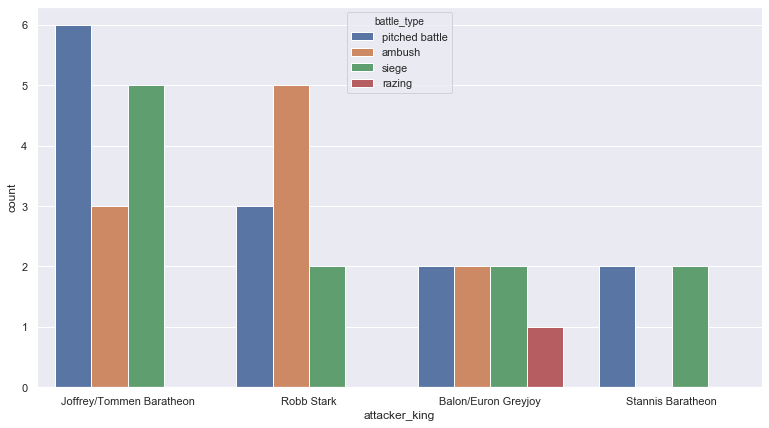

In [28]:
sns.countplot(x=battle.attacker_king, hue=battle.battle_type)
plt.show()

In [29]:
death = pd.read_csv('character-deaths.csv')
death.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


#### Data Inspection

In [33]:
death.shape

(917, 13)

In [34]:
death.describe(include='all')

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
count,917,917,305.000000,307.000000,299.000000,905.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
unique,916,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Myles,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,299.157377,2.928339,40.070234,28.861878,0.828790,0.468920,0.272628,0.353326,0.424209,0.272628,0.284624
std,NaN,NaN,0.703483,1.326482,20.470270,20.165788,0.376898,0.499305,0.445554,0.478264,0.494492,0.445554,0.451481
min,NaN,NaN,297.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,299.000000,2.000000,25.500000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,299.000000,3.000000,39.000000,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,300.000000,4.000000,57.000000,43.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                917 non-null    object 
 1   Allegiances         917 non-null    object 
 2   Death Year          305 non-null    float64
 3   Book of Death       307 non-null    float64
 4   Death Chapter       299 non-null    float64
 5   Book Intro Chapter  905 non-null    float64
 6   Gender              917 non-null    int64  
 7   Nobility            917 non-null    int64  
 8   GoT                 917 non-null    int64  
 9   CoK                 917 non-null    int64  
 10  SoS                 917 non-null    int64  
 11  FfC                 917 non-null    int64  
 12  DwD                 917 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 93.3+ KB


In [30]:
death.Gender.value_counts()

1    760
0    157
Name: Gender, dtype: int64

In [31]:
death.Nobility.value_counts()

0    487
1    430
Name: Nobility, dtype: int64

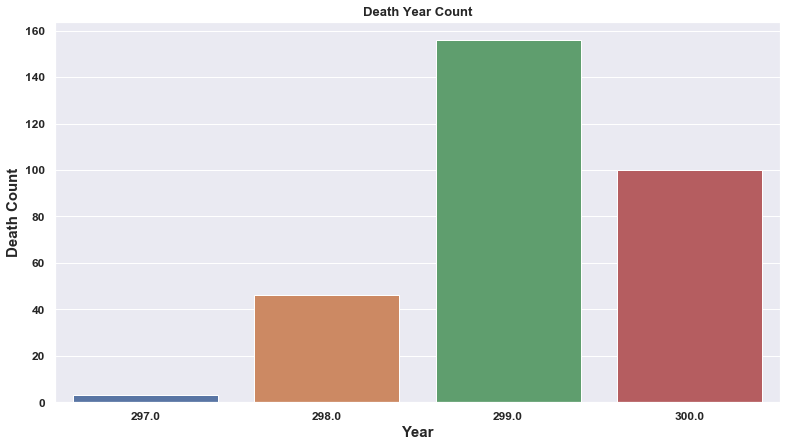

In [38]:
sns.countplot(death['Death Year'])
plt.xlabel('Year', fontsize=15, weight='bold')
plt.ylabel('Death Count', fontsize=15, weight='bold')
plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.title('Death Year Count', fontsize=13, weight='bold')
plt.show()

> Investigating how many Nobles died in which year

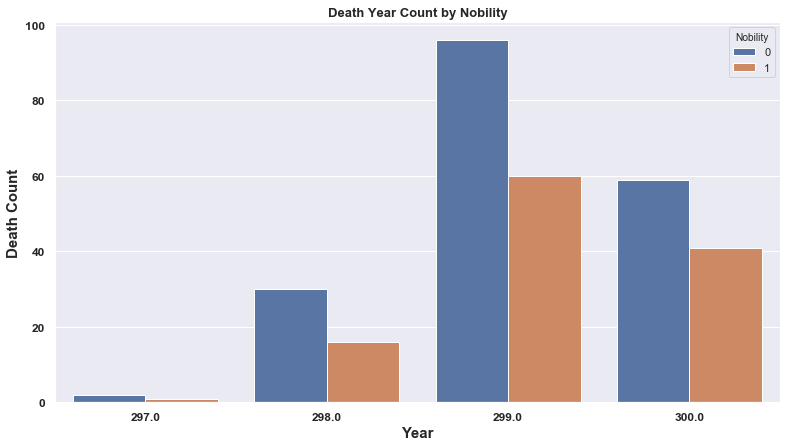

In [40]:
sns.countplot(death['Death Year'], hue='Nobility', data=death)
plt.xlabel('Year', fontsize=15, weight='bold')
plt.ylabel('Death Count', fontsize=15, weight='bold')
plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.title('Death Year Count by Nobility', fontsize=13, weight='bold')
plt.show()

> More nobles died in 299 and 300 as compared to 297 and 298

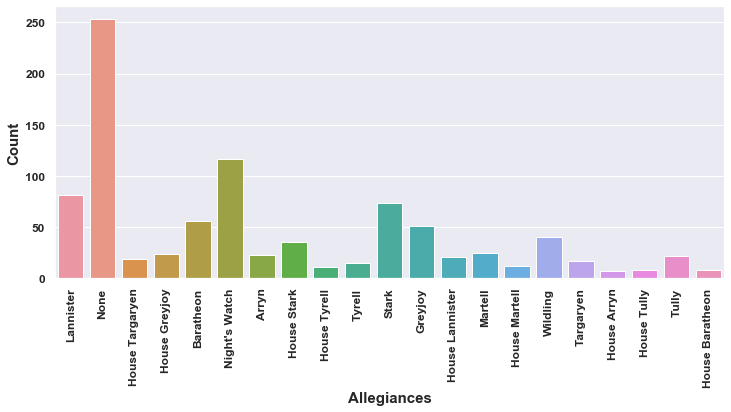

In [52]:
sns.set(rc={'figure.figsize': (12,5)})
sns.countplot(death.Allegiances)
plt.xlabel('Allegiances', fontsize=15, weight='bold')
plt.ylabel('Count', fontsize=15, weight='bold')
plt.xticks(fontsize=12, weight='bold', rotation=90)
plt.yticks(fontsize=12, weight='bold')
plt.show()